In [5]:
import os, sys
import pandas as pd
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

notebooks_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebooks_dir, os.pardir))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.data      import load_data
from src.utils     import set_seed
from sklearn.metrics import roc_curve, auc

set_seed(42)
sns.set(style="whitegrid")

In [6]:
oof_preds = np.load('../models/oof_preds.npy')

train = load_data('../data/processed/train_scaled.csv')
train['target'] = train['Personality'].map({'Extrovert': 0, 'Introvert': 1})

y_true = train['target']


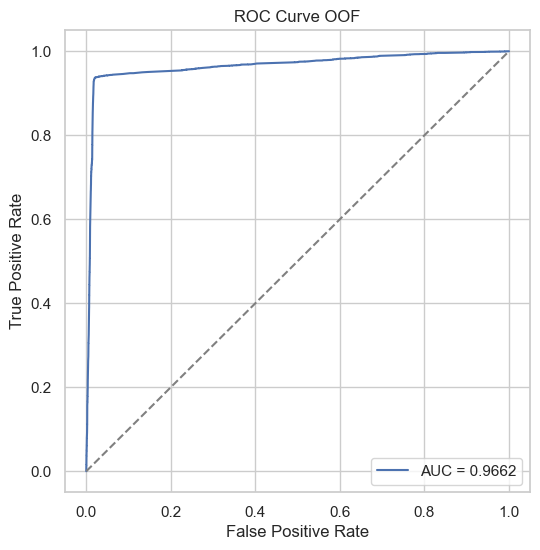

 OOF ROC AUC: 0.9662


In [7]:
fpr, tpr, _ = roc_curve(y_true, oof_preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve OOF')
plt.legend(loc='lower right')
plt.show()

print(f' OOF ROC AUC: {roc_auc:.4f}')


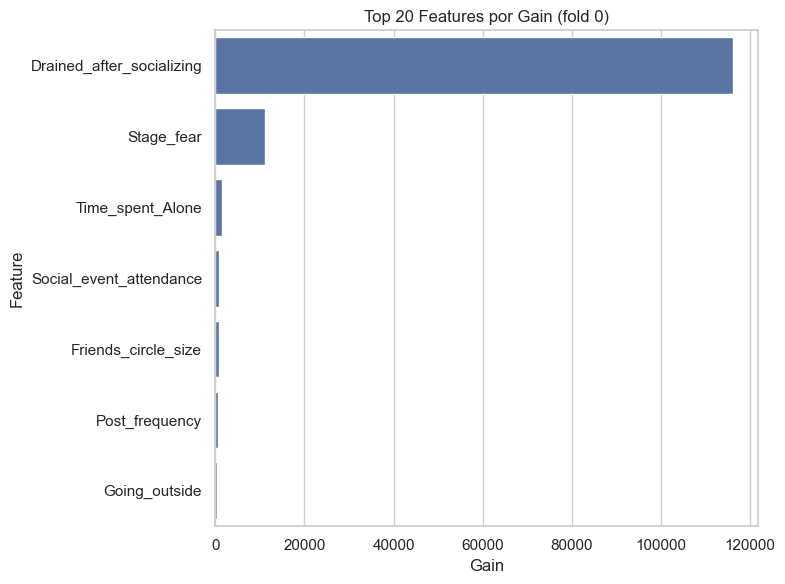

In [8]:
model0 = lgb.Booster(model_file='../models/lgbm_fold0.txt')

imp_df = pd.DataFrame({
    'feature': model0.feature_name(),
    'importance': model0.feature_importance(importance_type='gain')
}).sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=imp_df)
plt.title('Top 20 Features por Gain (fold 0)')
plt.xlabel('Gain')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
